In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [50]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

def f(x, noise_level=noise_level):
    return (np.sin(x)).sum() + np.random.randn() * noise_level

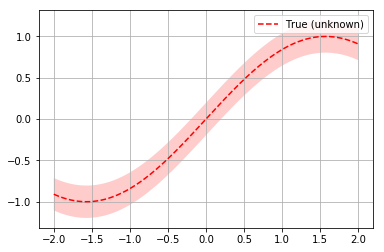

In [51]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

In [58]:
from dependence.gridsearch import gridsearch_minimize, quantile_func, proba_func
alpha = 0.05

q_func = np.mean

res = gridsearch_minimize(func=f,                  # the function to minimize
                          dimensions=[(-2.0, 2.0), (-2., 2.)],      # the bounds on each dimension of x
                          grid_size=500,
                          n_calls=10000,         # the number of evaluations of f
                          random_state=123,
                         q_func=q_func)   # the random seed
res.x

(500L, 10000L)


[-1.6151049410177745, -1.43616939940277]

In [85]:
from skopt.space import Space

K = 2
space = Space([(-2.0, 2.0)])
sample = space.rvs(K)

In [92]:
sample

[[-1.5539373600434634], [0.5229988767044782]]

In [101]:
n = 100
np.asarray(map(f, sample*n)).reshape(n, K).mean(axis=0)

array([-0.00677501,  0.36443106])

In [ ]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f 
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=123)   # the random seed